# Correction Comparison Plots

Some models have been corrected to account for their biological purposes (eg. in CC they were encoded as source nodes when in the experimental procedure the model was based on those variables were fixed at a given state). We plot their perturbation responses before and after correction.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm
from matplotlib.patches import Rectangle
%matplotlib inline

In [2]:
FIND_MODELS = False

if FIND_MODELS:
    from os import listdir
    
    models_dir = "models/corrected_models/"
    
    with open("models/corrected_models_list.csv", "w") as wfile:
        wfile.write("model name, correction\n")
        for fname in listdir(models_dir):
            with open(models_dir+fname) as rulefile:
                name = fname.strip(".txt")
                rules = rulefile.readline()
                if rules[0] == "#":
                    wfile.write(name+","+rules[2:])
    
    corrected_models = pd.read_csv("models/corrected_models_list.csv")
else:
    corrected_models = pd.read_csv("models/corrected_models_list.csv")

pd.set_option("display.max_colwidth", None)
corrected_models.sort_values(by=["model name"])

,model name,correction
2,BT474 Breast Cell Line Long-term ErbB Network,deleted isolated node: BAX
9,Bortezomib Responses in U266 Human Myeloma Cells,constant nodes from the original paper: TNFA=TNFAR=X=1 & SHP1=0
8,CD4 T cell signaling,constant nodes from the original paper: CAV1_ACTIVATOR=0
7,EGFR & ErbB Signaling,constant nodes from the original paper: erbb1=erbb2=erbb3=erbb4=pten=ship2=csrc=pdk1=esp8r=mtorr=pi3kr=sos1r=1 & mkp=pp2a=pp2b=0
14,Glucose Repression Signaling 2009,constant nodes from the orignal paper: GAL11=GAL2=GAL80=GLC7=GRR1=MALT=MIG1=REG1=RGT1=RGT2=SNF1=SNF3=SNF4=STD1=YCK1_2=1
5,Guard Cell Abscisic Acid Signaling,constant nodes from the original paper: ABH1=ERA1=GCR1=1
11,HCC1954 Breast Cell Line Long-term ErbB Network,deleted isolated nodes: Nfkb & BAX
4,HGF Signaling in Keratinocytes,constant nodes from the original paper: AKAP12=PTEN=DUSP1=0 & PAI-1=1
13,HIV-1 interactions with T Cell Signalling Pathway,constant nodes from the original paper: antigen=BCAR1=CD45=Chemokine=CRKL=DLGH1=GADD45=GRKL=ICOS=IKBNFKB=PDCD1_PD1=1 & RASA=0
10,IL-1 Signaling,constant nodes from the original paper: abin2=ck2=ikka=ikkb=mtorc2=pdk1=1 & irakm=pten=sil1r12=smyd88=socs1=socs3=0


In [3]:
# Load Cell Collective Models

models_dir = "cell_collective"

QCF = pd.read_csv(f"data/{models_dir}/quasicoherence_fuzzy_withsource.csv")
QCN = pd.read_csv(f"data/{models_dir}/quasicoherence_nonfuzzy_withsource.csv")
QCFNS = pd.read_csv(f"data/{models_dir}/quasicoherence_fuzzy_sourceless.csv")
QCNS = pd.read_csv(f"data/{models_dir}/quasicoherence_nonfuzzy_sourceless.csv")
FHD = pd.read_csv(f"data/{models_dir}/final_hamming_distance_withsource.csv")
FHDNS = pd.read_csv(f"data/{models_dir}/final_hamming_distance_sourceless.csv")
DC = pd.read_csv(f"data/{models_dir}/derrida_coefficients.csv")
QC = pd.read_csv("data/model_categories.csv")

QC = QC.merge(QCN)
QC = QC.merge(QCF)
QC = QC.merge(QCNS)
QC = QC.merge(QCFNS)
QC = QC.merge(FHD)
QC = QC.merge(FHDNS)
QC = QC.merge(DC)
QC.columns = ["name", "category", "PMID",
              "SQC", "AQC", 
              "SFQC", "AFQC", 
              "SQCNS", "AQCNS", 
              "SFQCNS", "AFQCNS",
              "SFHD", "AFHD", 
              "SFHDNS", "AFHDNS",
              "SDC", "ADC", 
              "SDCNS", "ADCNS"]



N = []
NS = []
for name in sorted(QC["name"]):
    with open(f"models/{models_dir}/{name}.txt") as f:
        nt = 0
        ns = 0
        for row in f:
            nt += 1
            if row.split(",")[0].strip() == row.split(",")[1].strip():
                ns += 1
        N.append(nt)
        NS.append(ns)

NDF = pd.DataFrame({
    "name": sorted(QC["name"]),
    "N": N,
    "NS": NS,
})

QC=QC.merge(NDF)

# Fragility = 
# long-term difference in node avg. values after initial 1-node perturbation
QC["AF"] = (1-QC["AFQC"])*(QC["N"])
QC["SF"] = (1-QC["SFQC"])*(QC["N"])
QC["AFNS"] = (1-QC["AFQCNS"])*(QC["N"]-QC["NS"])
QC["SFNS"] = (1-QC["SFQCNS"])*(QC["N"]-QC["NS"])

models = QC[QC["name"].isin(corrected_models["model name"])]

In [4]:

# Load Corrected Models

models_dir = "corrected_models"

cQCF = pd.read_csv(f"data/{models_dir}/quasicoherence_fuzzy_withsource.csv")
cQCN = pd.read_csv(f"data/{models_dir}/quasicoherence_nonfuzzy_withsource.csv")
cQCFNS = pd.read_csv(f"data/{models_dir}/quasicoherence_fuzzy_sourceless.csv")
cQCNS = pd.read_csv(f"data/{models_dir}/quasicoherence_nonfuzzy_sourceless.csv")
cFHD = pd.read_csv(f"data/{models_dir}/final_hamming_distance_withsource.csv")
cFHDNS = pd.read_csv(f"data/{models_dir}/final_hamming_distance_sourceless.csv")
cDC = pd.read_csv(f"data/{models_dir}/derrida_coefficients.csv")
cQC = pd.read_csv("data/model_categories.csv")

cQC = cQC.merge(cQCN)
cQC = cQC.merge(cQCF)
cQC = cQC.merge(cQCNS)
cQC = cQC.merge(cQCFNS)
cQC = cQC.merge(cFHD)
cQC = cQC.merge(cFHDNS)
cQC = cQC.merge(cDC)

cQC.columns = ["name", "category", "PMID",
              "CSQC", "CAQC", 
              "CSFQC", "CAFQC", 
              "CSQCNS", "CAQCNS", 
              "CSFQCNS", "CAFQCNS",
              "CSFHD", "CAFHD", 
              "CSFHDNS", "CAFHDNS",
              "CSDC", "CADC", 
              "CSDCNS", "CADCNS"]



N = []
NS = []
for name in sorted(cQC["name"]):
    with open(f"models/{models_dir}/{name}.txt") as f:
        nt = 0
        ns = 0
        for row in f:
            if row[0] == "#":
                continue
            nt += 1
            if row.split(",")[0].strip() == row.split(",")[1].strip():
                ns += 1
        N.append(nt)
        NS.append(ns)

cNDF = pd.DataFrame({
    "name": sorted(cQC["name"]),
    "CN": N,
    "CNS": NS,
})

cQC=cQC.merge(cNDF)

# Fragility = 
# long-term difference in node avg. values after initial 1-node perturbation
cQC["CAF"] = (1-cQC["CAFQC"])*(cQC["CN"])
cQC["CSF"] = (1-cQC["CSFQC"])*(cQC["CN"])
cQC["CAFNS"] = (1-cQC["CAFQCNS"])*(cQC["CN"]-cQC["CNS"])
cQC["CSFNS"] = (1-cQC["CSFQCNS"])*(cQC["CN"]-cQC["CNS"])

CM = cQC[cQC["name"].isin(corrected_models["model name"])]
models = models.merge(CM)

In [5]:
# Plot Settings
plt.rcParams.update({"font.size":28})
highlight_marker_size = 350
highlight_alpha = 1

color_list = ["#88CCEE", "#44AA99", "#117733", "#433685", "#DDCC77", "#999933","#CC6677", "#882255", "#AA4499", "#4141FF"] # tol_muted scheme

highlight_dict = {
    "Apoptosis Network":(color_list[0],highlight_marker_size,highlight_alpha),
    "Arabidopsis thaliana Cell Cycle":(color_list[1],highlight_marker_size,highlight_alpha),
    "Aurora Kinase A in Neuroblastoma":(color_list[2],highlight_marker_size,highlight_alpha),
    "Colitis-associated colon cancer": (color_list[5],highlight_marker_size,highlight_alpha),
    "Cortical Area Development":(color_list[4],highlight_marker_size,highlight_alpha),
    "Human Gonadal Sex Determination": (color_list[3],highlight_marker_size,highlight_alpha),
    "Metabolic Interactions in the Gut Microbiome":(color_list[6],highlight_marker_size,highlight_alpha),
    "Regulation of the L-arabinose operon of Escherichia coli":(color_list[7],highlight_marker_size,highlight_alpha),
    "Tumour Cell Invasion and Migration": (color_list[8],highlight_marker_size,highlight_alpha),
    "Signal Transduction in Fibroblasts": (color_list[9],highlight_marker_size,highlight_alpha),
}
default_highlight = ("black",250,0.2)

category_symbol_dict = {
    "Cancer": "X",
    "Cancer Drug Response": "P",
    "Cell Cycle": "o",
    "Development and Differentiation": "d",
    "Infection and Microbiome": "p",
    "Metabolism": "H",
    "Signal Transduction (Immune System Cells)": "^",
    "Signal Transduction (Other)": "v",
    "Signal Transduction (Drosophila)": ">",
    "Signal Transduction (Stress/Damage and Homeostasis)": "<",
}

measures_label_dict = {"S": "Synchronous", "A": "Asynchronous", "": "", "NS": "(fixed source)", "QC": "Quasicoherence", 
                       "FQC": "Fuzzy Quasicoherence", "FHD": "Final Hamming distance", "F": "Fragility", "DC": "Derrida coefficient"}

axis_bounds = {"QC": [0.6, 1.1], "FQC": [0.9, 1.01], "FHD": [-0.1, 1.8], "F": [-0.1, 1.3], "DC": [0.4, 1.3]}

def hc(df):
    return [highlight_dict.get(name, default_highlight)[0] for name in df["name"]]
def hs(df):
    return [highlight_dict.get(name, default_highlight)[1] for name in df["name"]]
def halpha(df):
    return [highlight_dict.get(name, default_highlight)[2] for name in df["name"]]

groups = models.groupby("category")

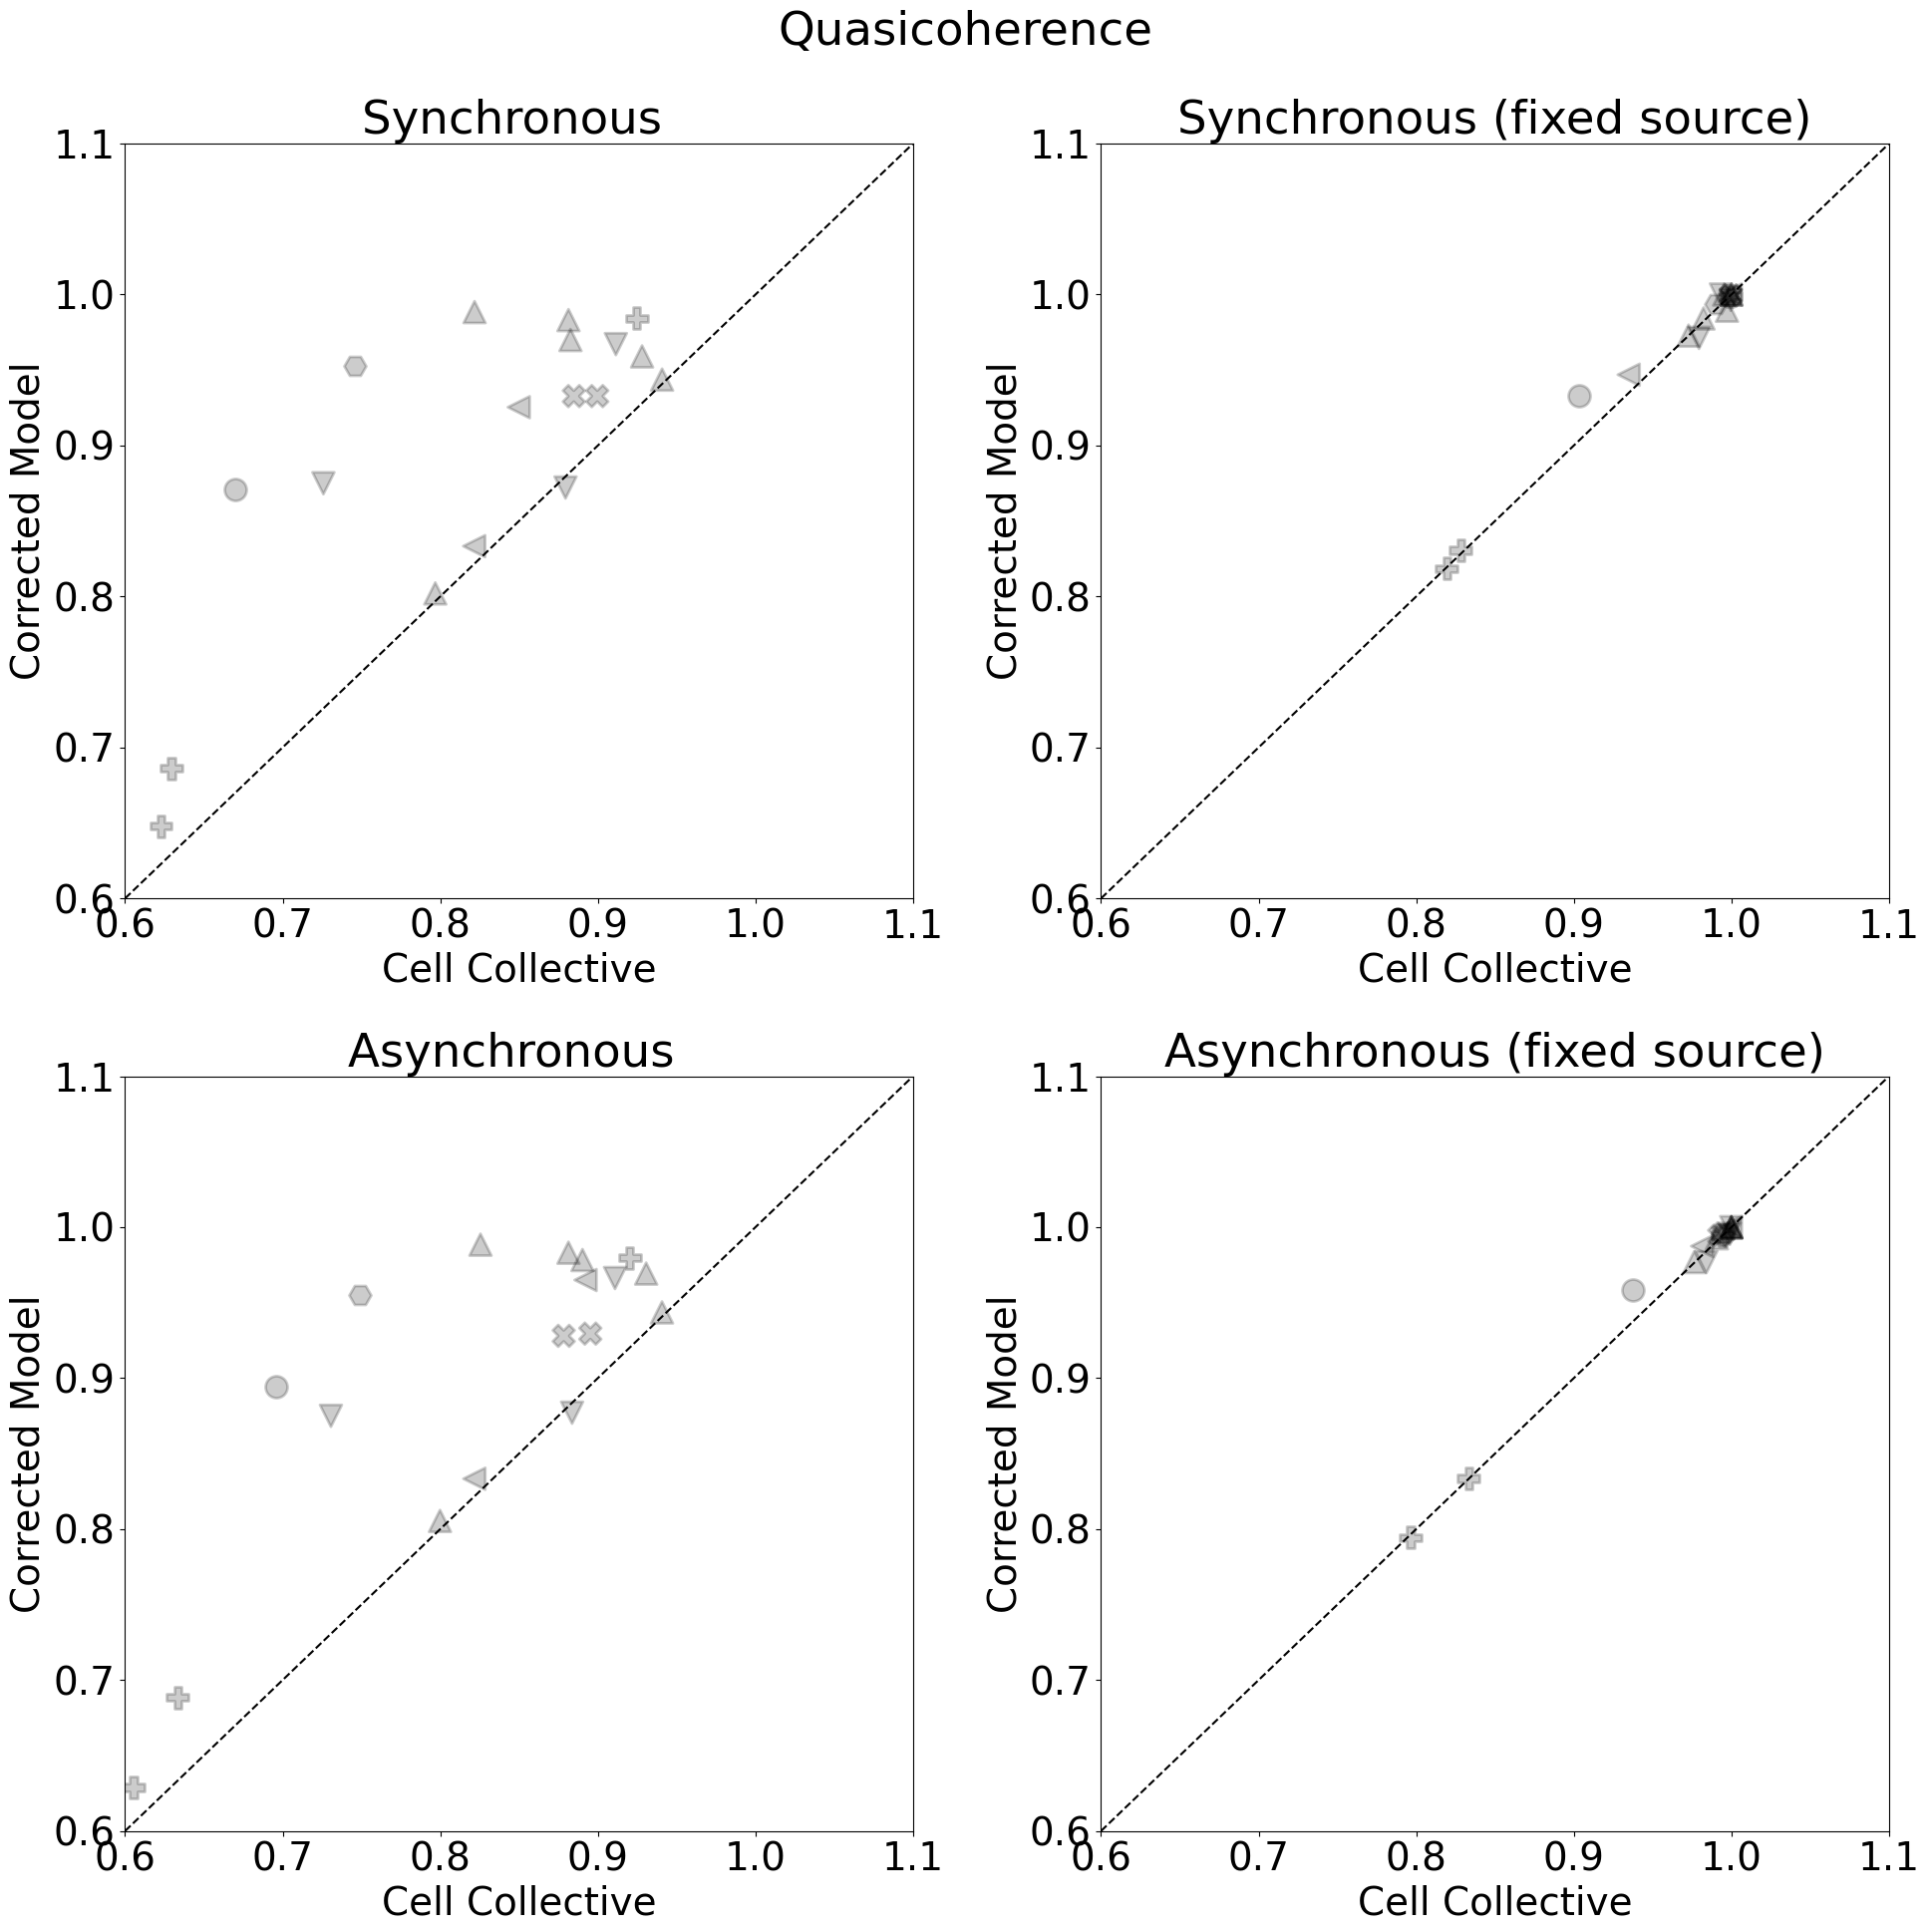

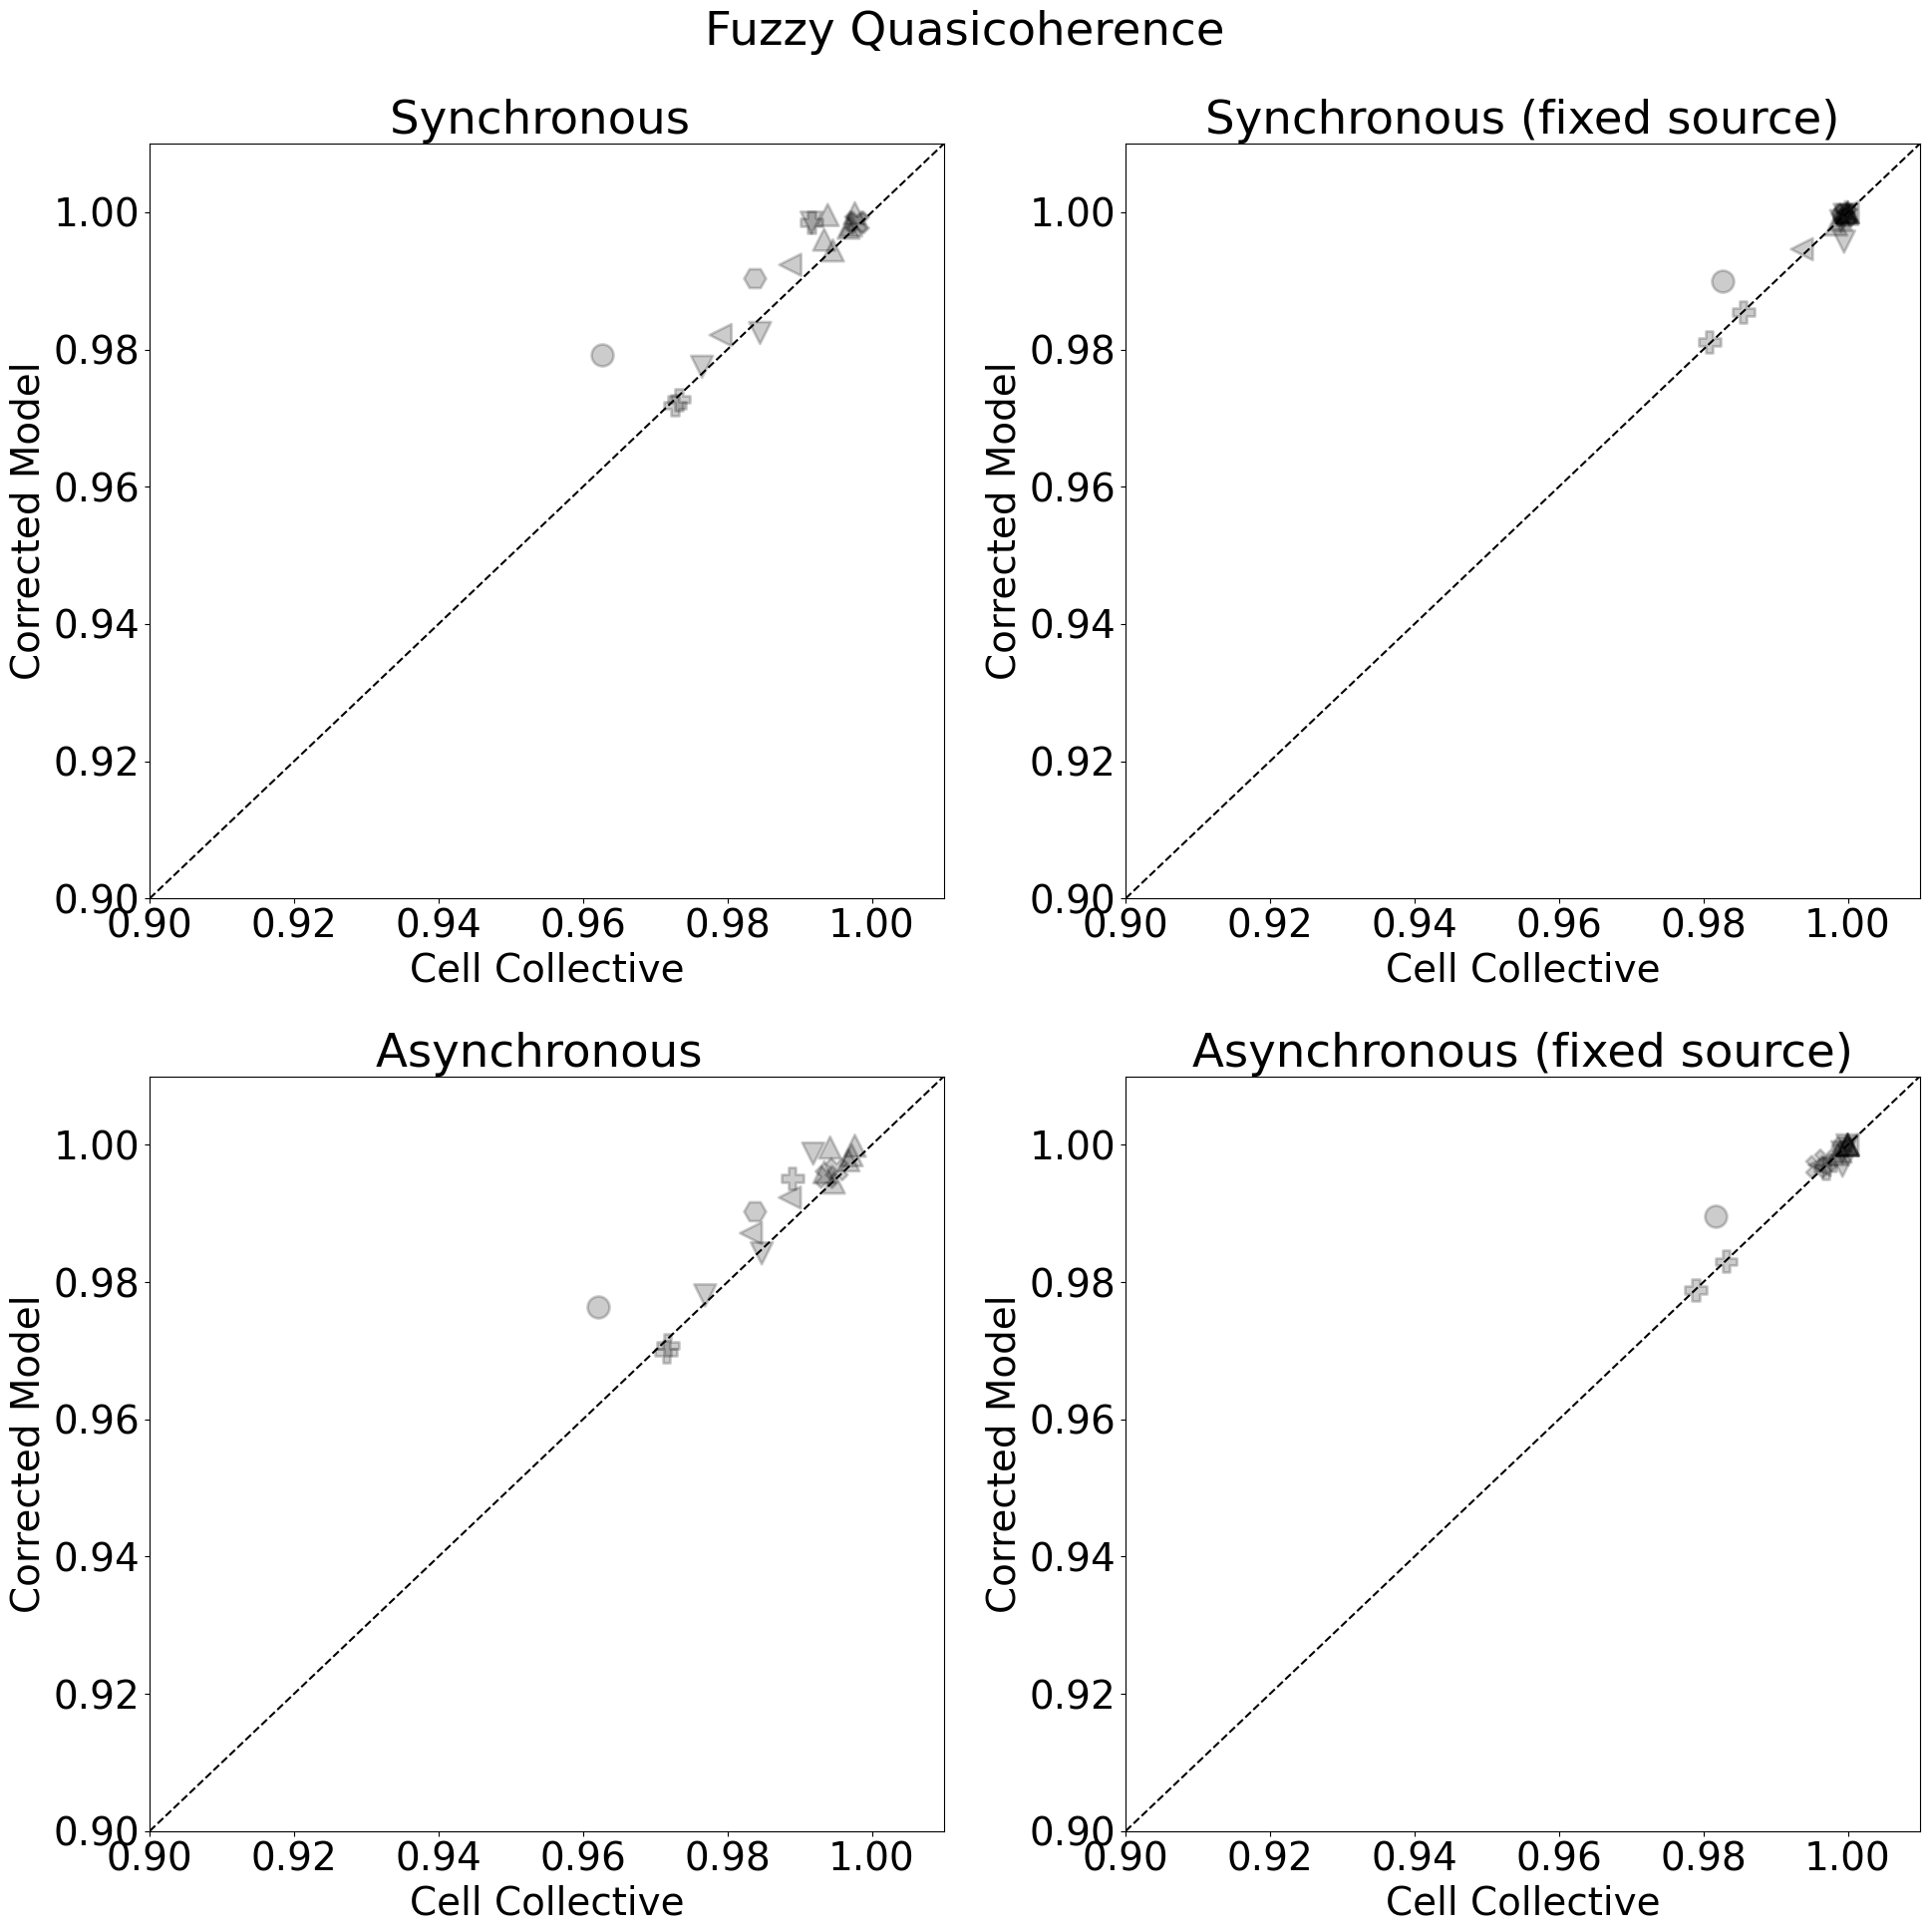

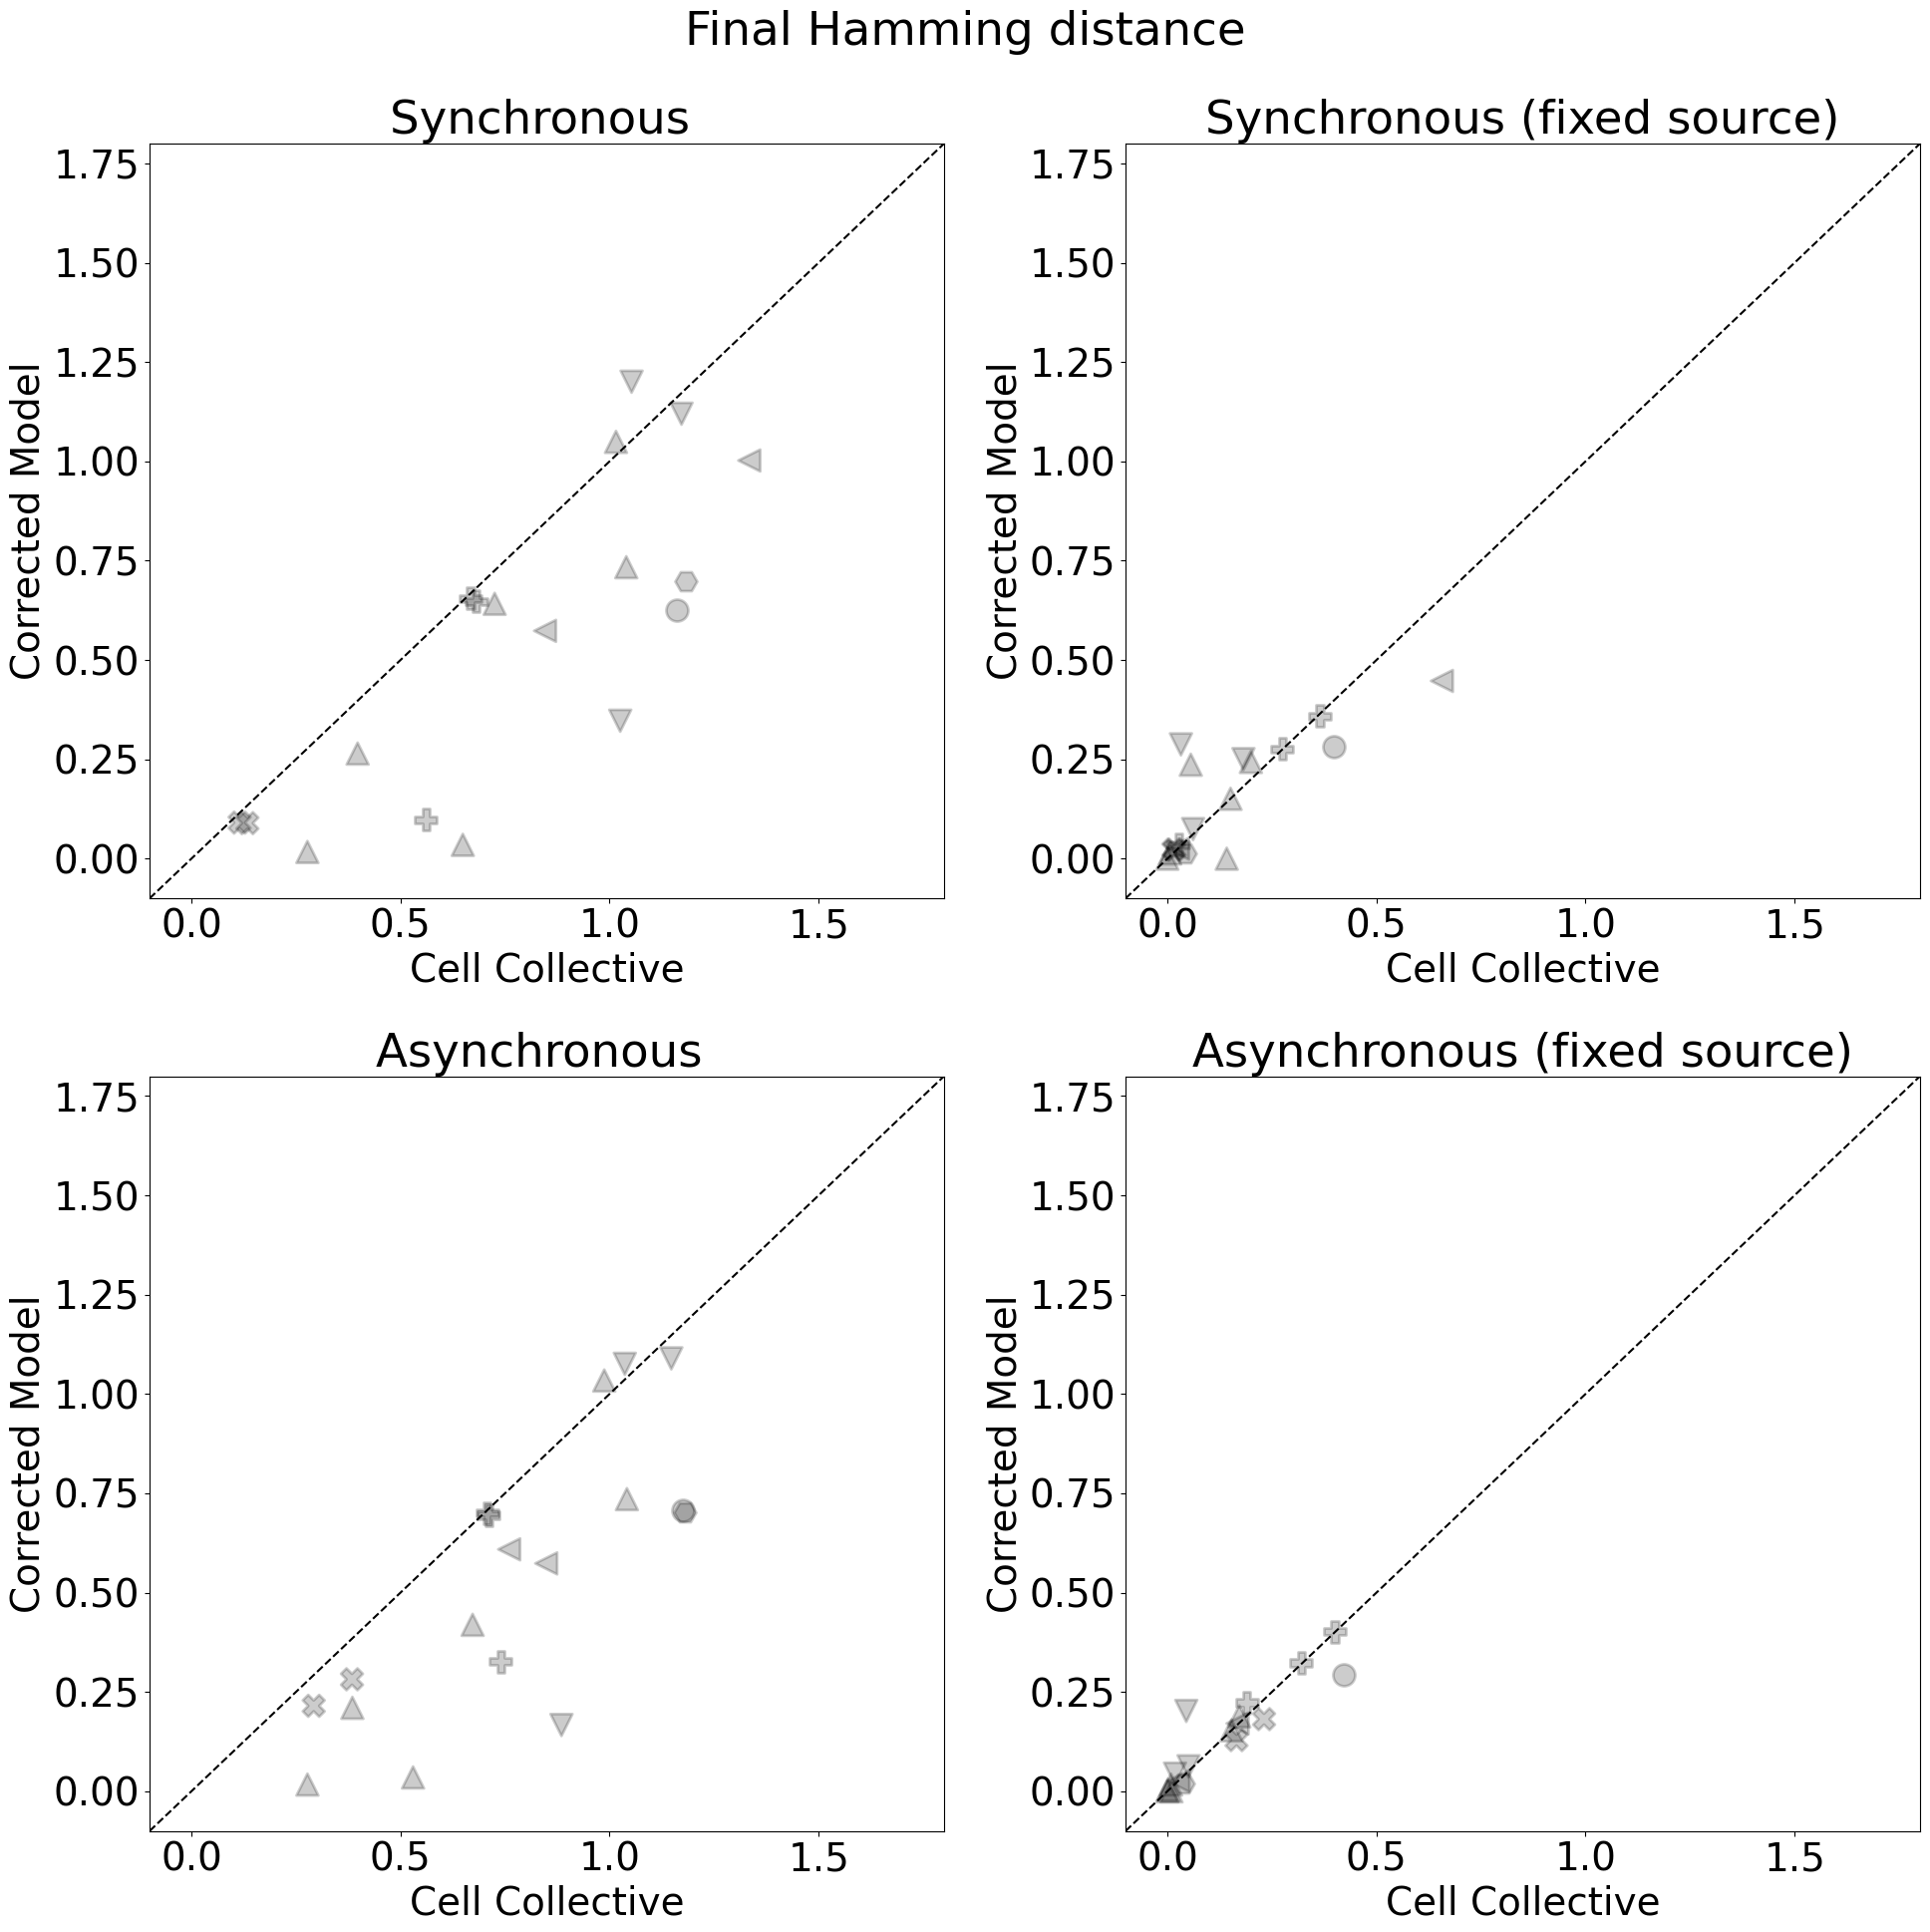

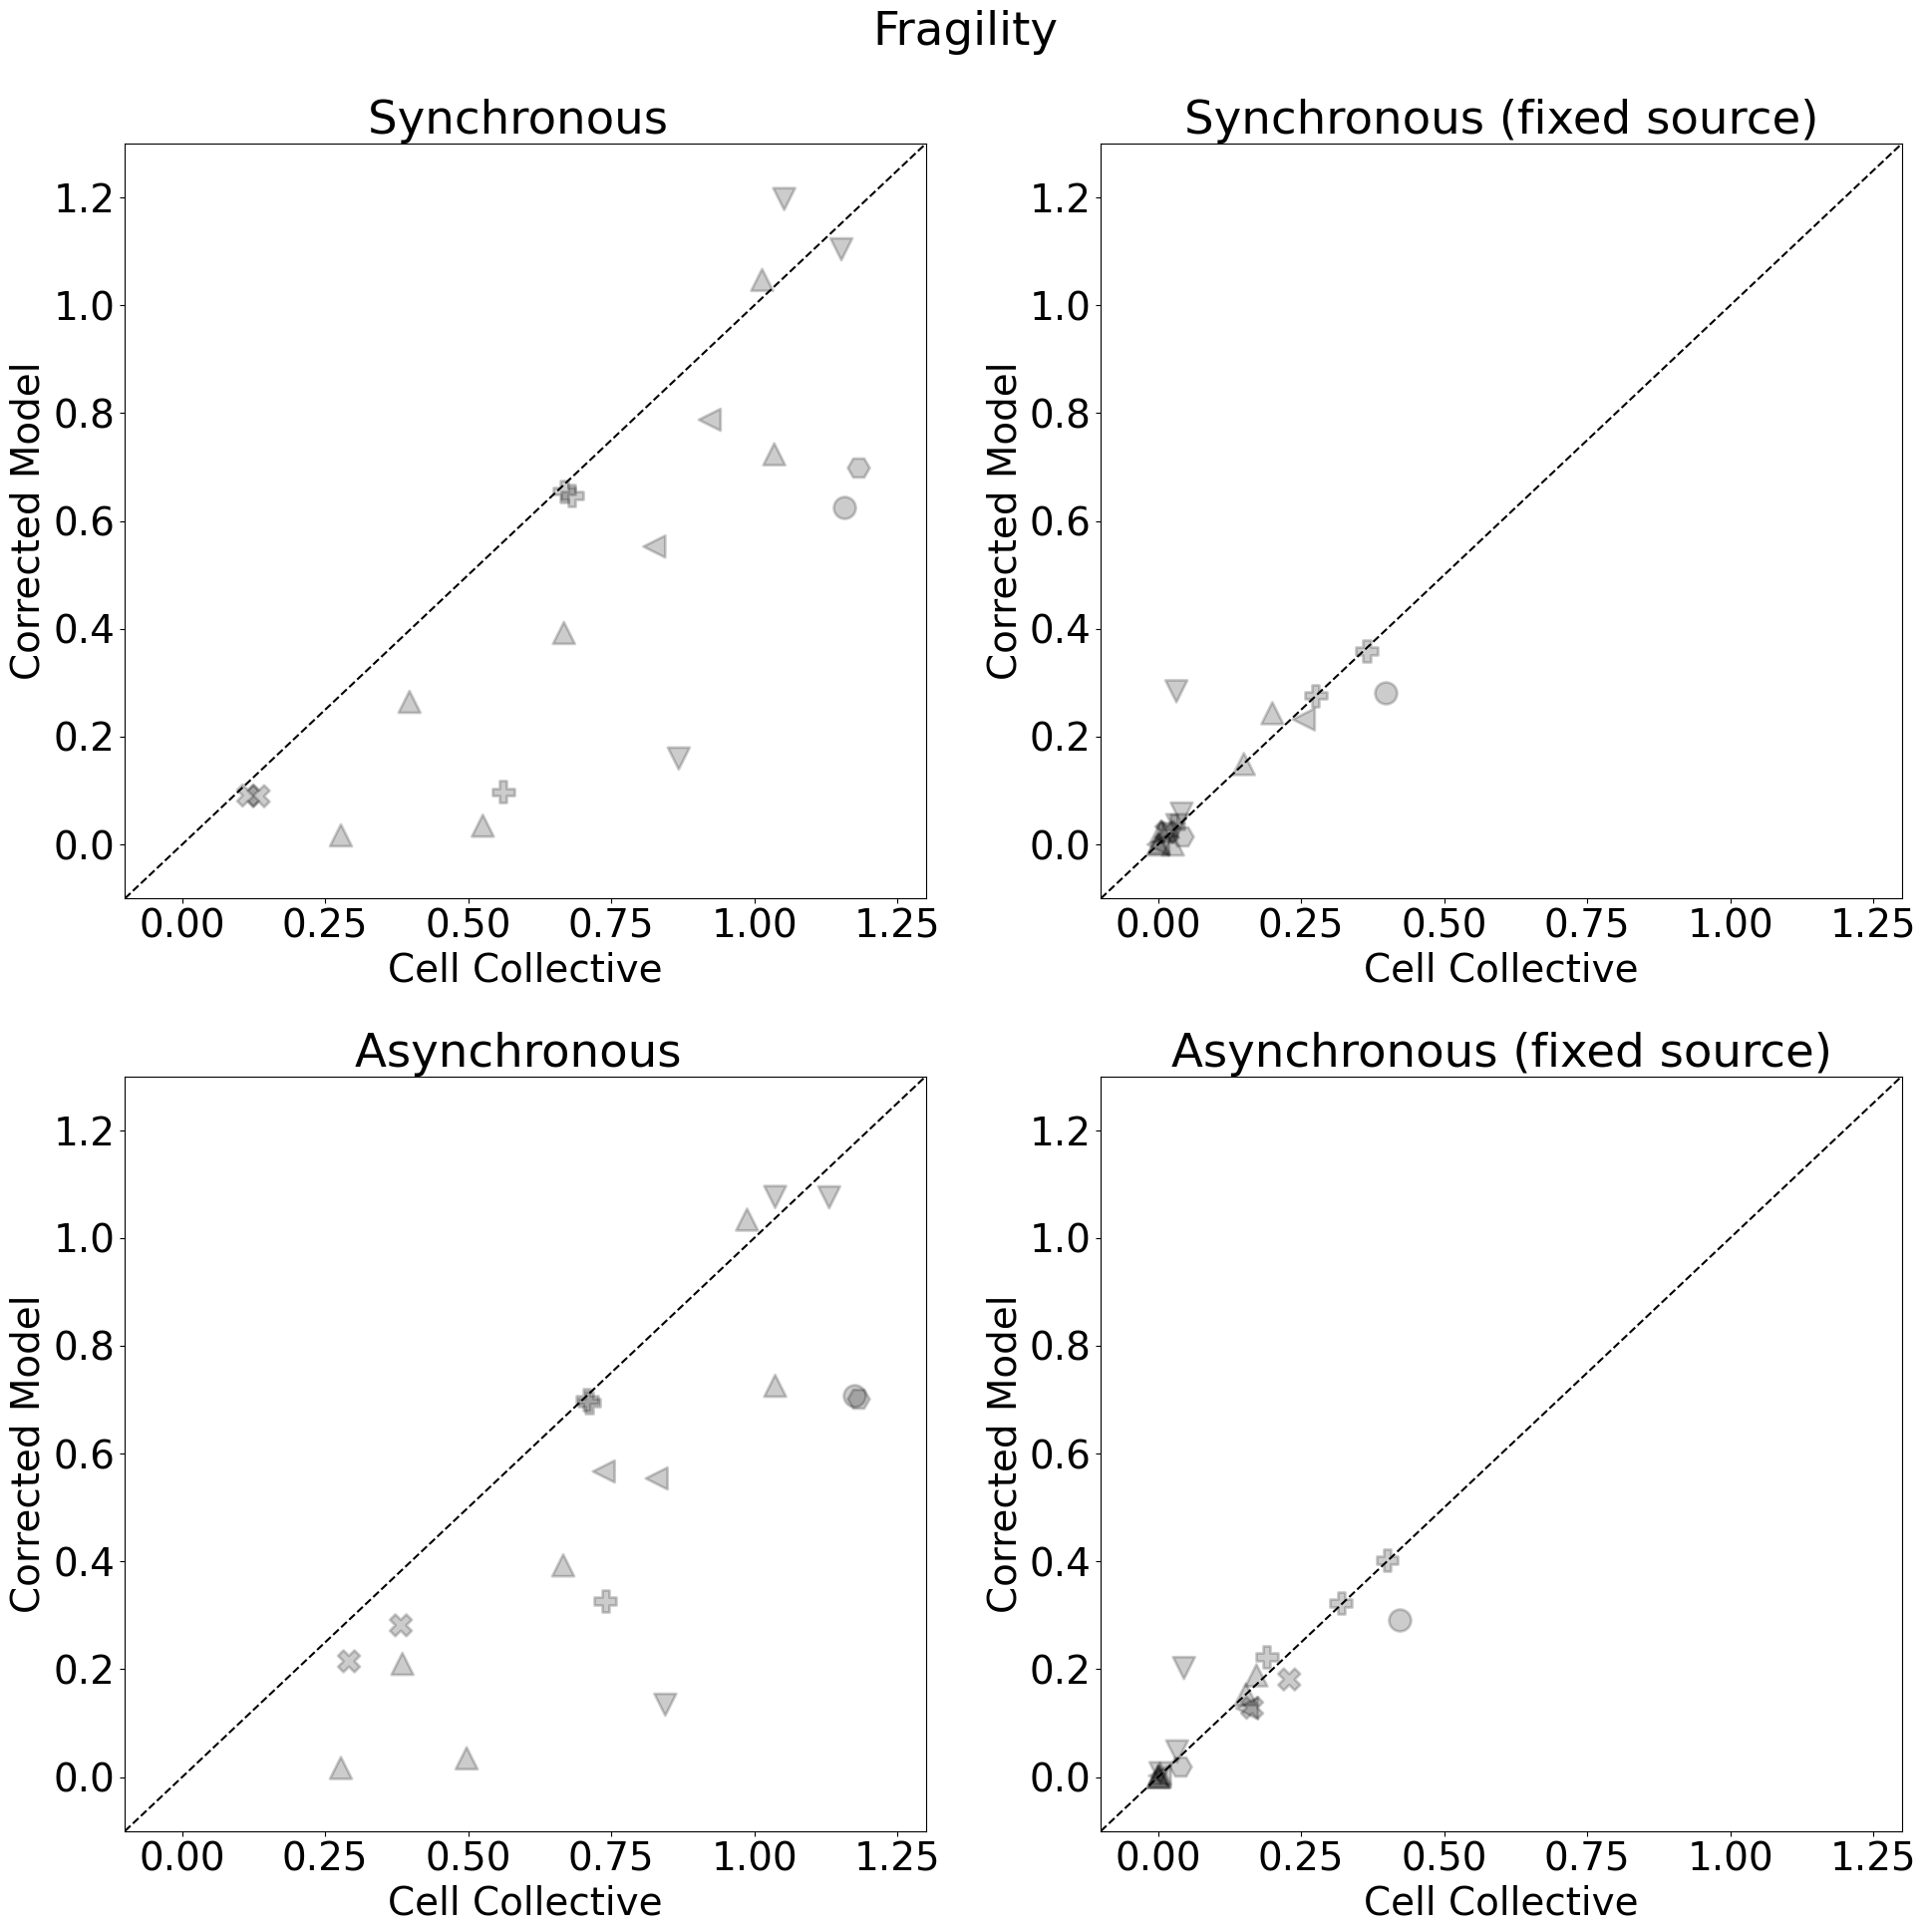

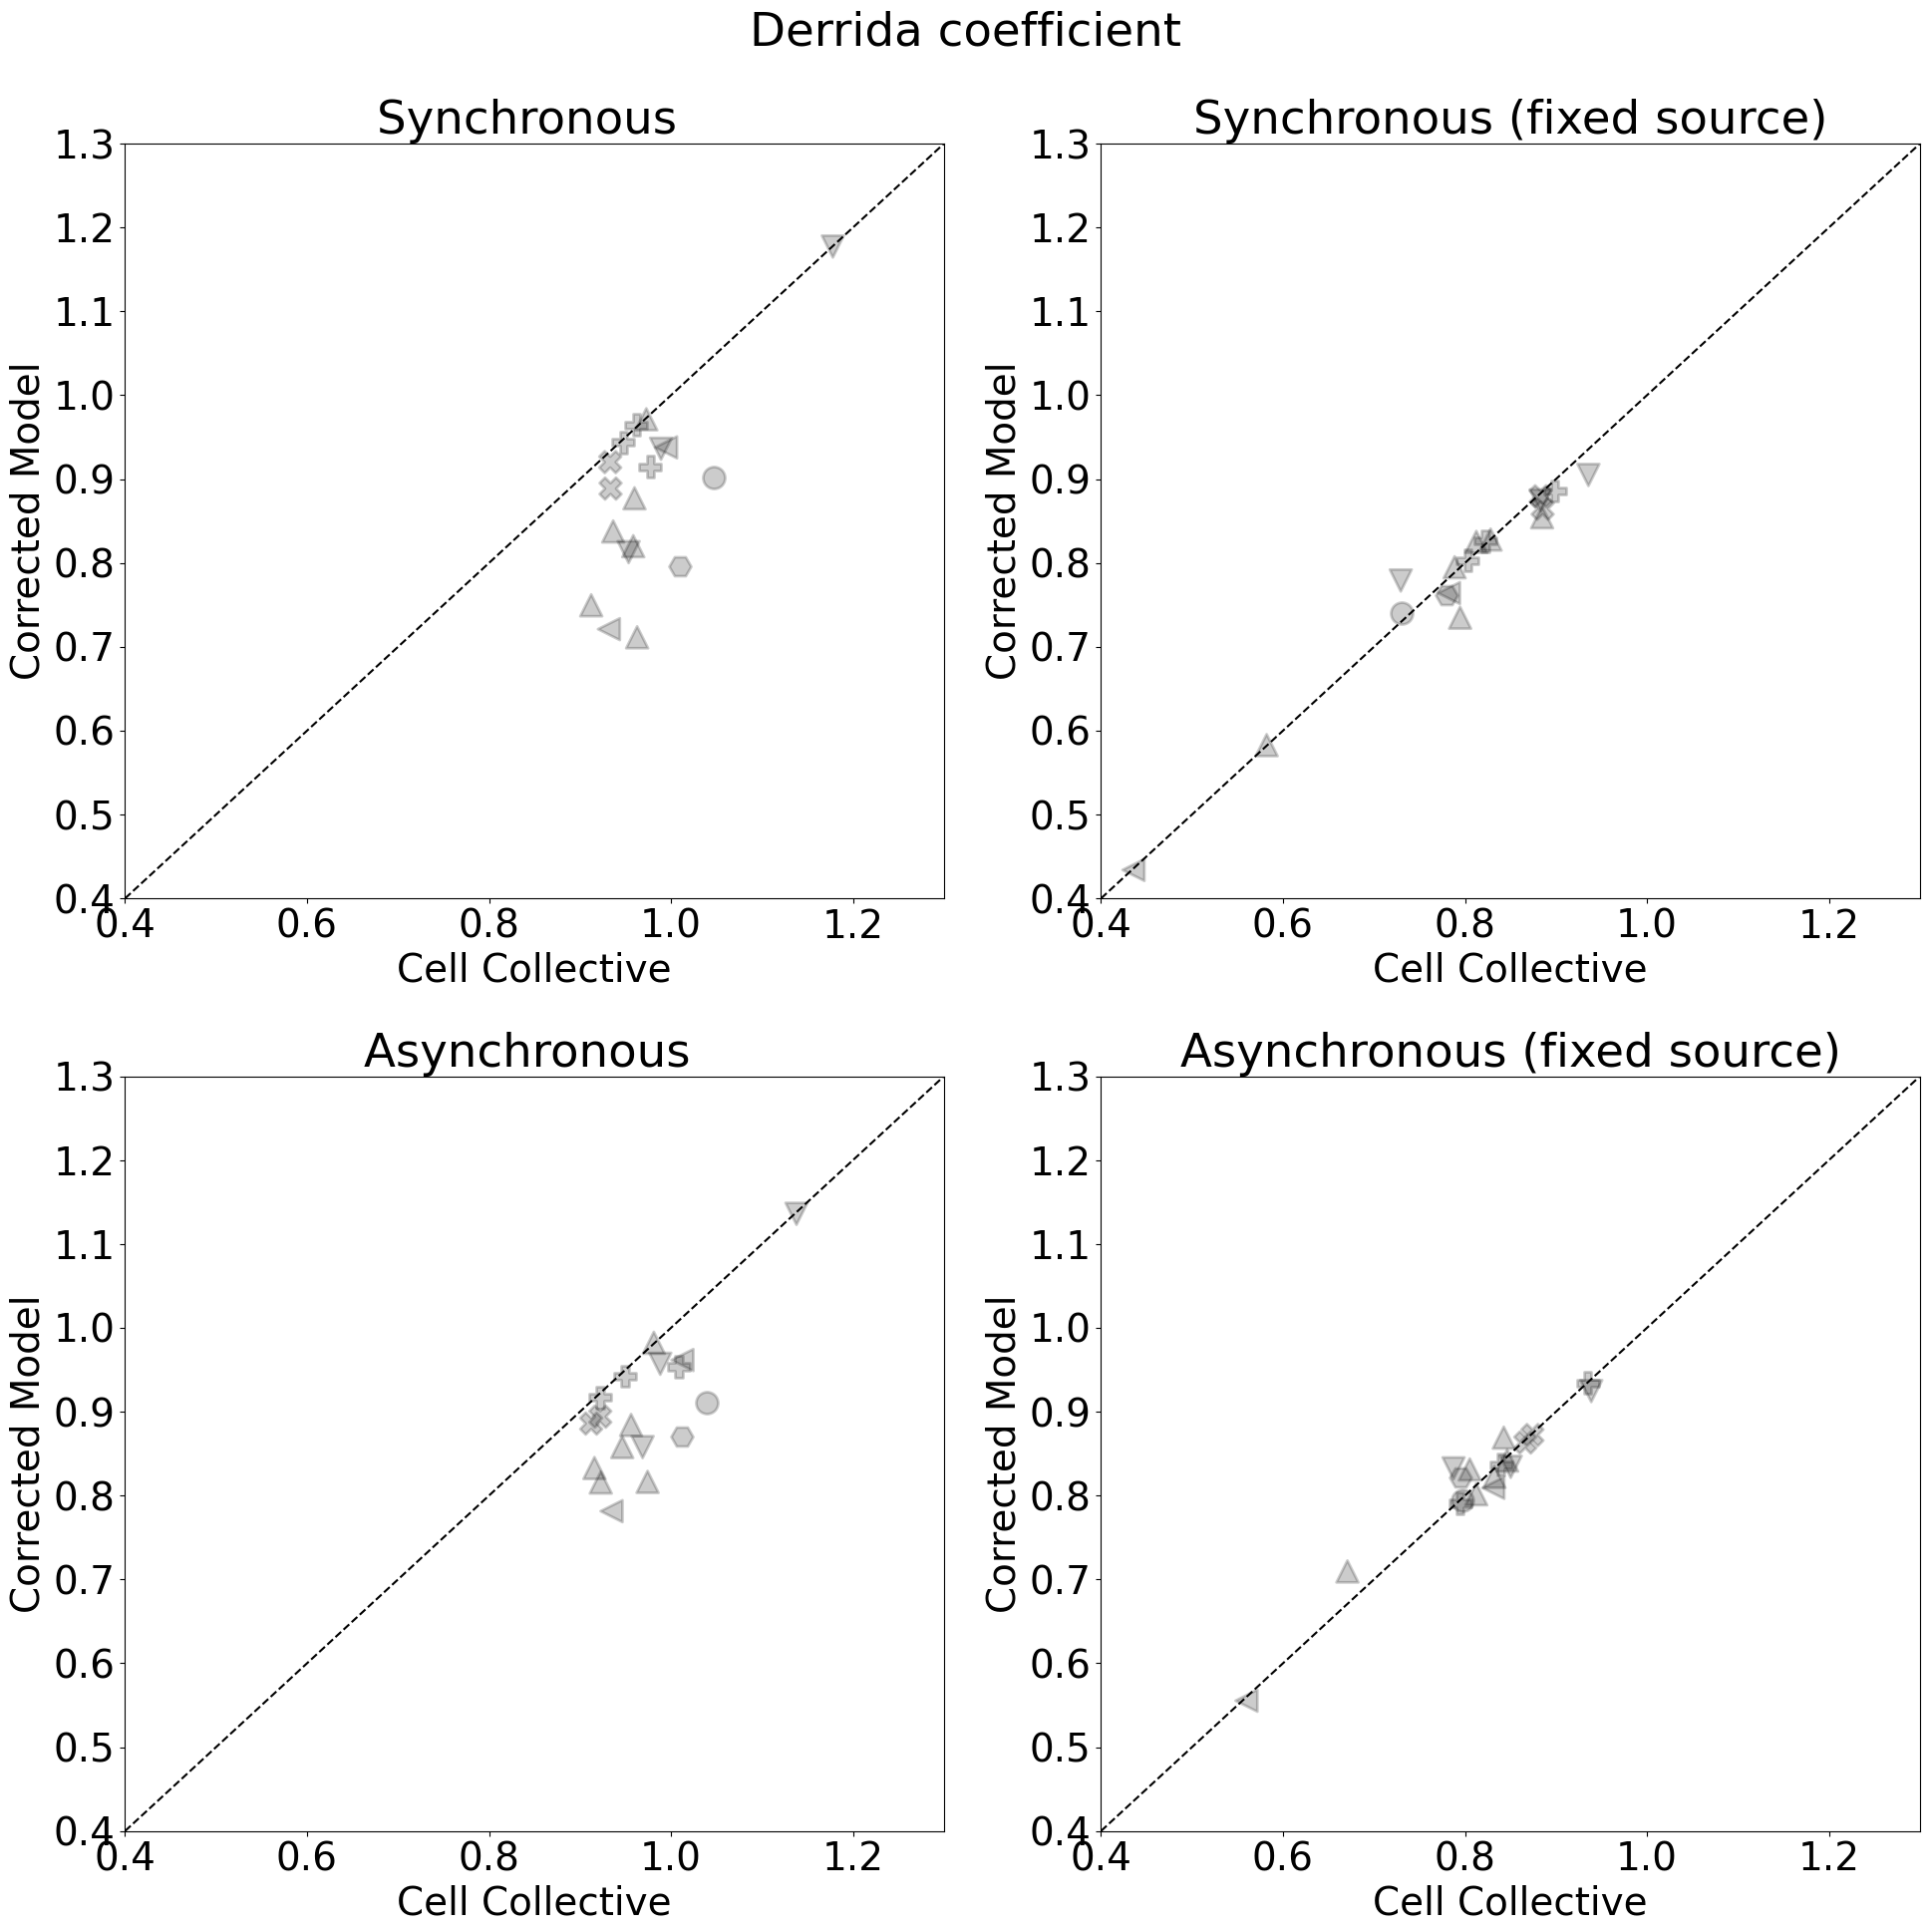

In [6]:
for measure in ["QC", "FQC", "FHD", "F", "DC"]:
    
    fig,ax = plt.subplots(2,2,figsize=(20,20))
    fig.set_facecolor("white")
    
    for name,group in groups:
        for i, scheme in enumerate(["S", "A"]):
            for j, sources in enumerate(["", "NS"]):
                label = scheme+measure+sources
                ax[i,j].scatter(group[label],group["C" + label],c=hc(group),s=hs(group),alpha=halpha(group),marker=category_symbol_dict[name],linewidths=2,edgecolor="k")
                ax[i,j].set_title(measures_label_dict[scheme] + " " + measures_label_dict[sources])
                ax[i,j].set_xlim(axis_bounds[measure][0], axis_bounds[measure][1])
                ax[i,j].set_ylim(axis_bounds[measure][0], axis_bounds[measure][1])
                
    for sub_ax in ax.flatten():
        sub_ax.axline((1,1),slope=1,linestyle="--",color="k")
        sub_ax.set_xlabel("Cell Collective")
        sub_ax.set_ylabel("Corrected Model")
    
    fig.suptitle(measures_label_dict[measure])
    
    plt.tight_layout()
    plt.savefig(f"./data/comparison_figures/Comparison_{measures_label_dict[measure]}.png")
    plt.savefig(f"./data/comparison_figures/Comparison_{measures_label_dict[measure]}.pdf")
    plt.show()